In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

dataset_path = '/content/drive/MyDrive/AI SESSION PROJECT/New_Skin_Data_1'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images to range [0,1]
    shear_range=0.2,  # Random shear transformations
    zoom_range=0.2,  # Random zoom transformations
    horizontal_flip=True)  # Randomly flip images horizontally

test_datagen = ImageDataGenerator(rescale=1./255)

# Train dataset directory path
train_dir = os.path.join(dataset_path, 'train')  # Update with actual folder path
test_dir = os.path.join(dataset_path, 'test')    # Update with actual folder path

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary')  # Binary classification (e.g., Cancer vs No Cancer)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 84 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Update based on your dataset size
    epochs=10,
    validation_data=test_generator,
    validation_steps=50)  # Update based on your dataset size


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/100 ━━━━━━━━━━━━━━━━━━━━ 2:11 1s/step - accuracy: 0.5208 - loss: 1.3142

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 148ms/step - accuracy: 0.5006 - loss: 1.6752 - val_accuracy: 0.2059 - val_loss: 1.3258
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 62ms/step - accuracy: 0.6052 - loss: 0.7745 - val_accuracy: 0.7451 - val_loss: 0.6665
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.5139 - loss: 0.7074 - val_accuracy: 0.7157 - val_loss: 0.6509
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.5980 - loss: 0.7746 - val_accuracy: 0.7696 - val_loss: 0.6268
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.5719 - loss: 0.6696 - val_accuracy: 0.8039 - val_loss: 0.6075
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.5357 - loss: 0.6712 - val_accuracy: 0.3873 - val_loss: 0.7264
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step - accuracy: 0.6535 - loss: 0.6242 - val_accuracy: 0.7598 - val_loss: 0.6191
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.5845 - loss: 0.6224 - val_accur

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=50)  # Update based on your dataset size
print(f"Test accuracy: {test_acc}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.6798 - loss: 0.7778
Test accuracy: 0.6764705777168274


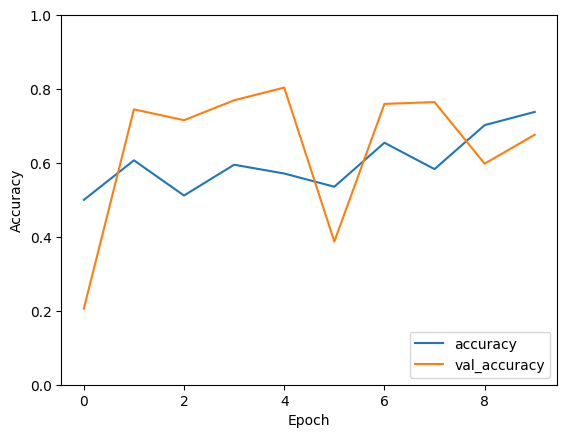

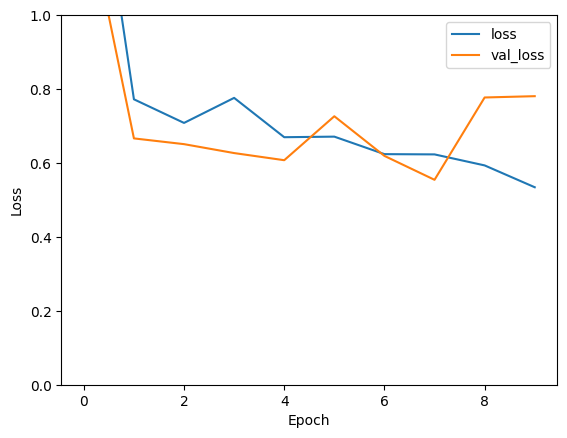

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Save the model
model.save('/content/drive/MyDrive/saved_skin_cancer_model.h5')

# Load the model (if needed)
from tensorflow.keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/saved_skin_cancer_model.h5')


In [ ]:
from tensorflow.keras.preprocessing import image

# Load a sample image
img_path = '/content/drive/MyDrive/AI SESSION PROJECT/New_Skin_Data_1/data/Testing/Cancer/1714-02.jpg'  # Replace with actual path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)
if prediction < 0.5:
    print("No Cancer")
else:
    print("Cancer Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Cancer Detected


In [ ]:
from tensorflow.keras.preprocessing import image

# Load a sample image
img_path = '/content/drive/MyDrive/AI SESSION PROJECT/New_Skin_Data_1/data/Testing/Non_cancer/1032.jpg'  # Replace with actual path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)
if prediction < 0.5:
    print("No Cancer")
else:
    print("Cancer Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
No Cancer
